In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rent = pd.read_csv('manhattan_rents.csv')

In [3]:
print(rent)

      rental_id     rent  bedrooms  bathrooms  size_sqft  min_to_subway  \
0          1545   2550.0       0.0          1      480.0              9   
1          2472  11500.0       2.0          2     2000.0              4   
2          2919   4500.0       1.0          1      916.0              2   
3          2790   4795.0       1.0          1      975.0              3   
4          3946  17500.0       2.0          2     4800.0              3   
...         ...      ...       ...        ...        ...            ...   
3534       7582   4210.0       1.0          1      532.0              3   
3535       5686   6675.0       2.0          2      988.0              5   
3536       9679   1699.0       0.0          1      250.0              2   
3537       5188   3475.0       1.0          1      651.0              6   
3538       4718   4500.0       1.0          1      816.0              4   

      floor  building_age_yrs  
0       2.0                17  
1       1.0                96  
2  

In [4]:
rent.isnull().any()
rent.dropna(inplace=True)
print(rent)

      rental_id     rent  bedrooms  bathrooms  size_sqft  min_to_subway  \
0          1545   2550.0       0.0          1      480.0              9   
1          2472  11500.0       2.0          2     2000.0              4   
2          2919   4500.0       1.0          1      916.0              2   
3          2790   4795.0       1.0          1      975.0              3   
4          3946  17500.0       2.0          2     4800.0              3   
...         ...      ...       ...        ...        ...            ...   
3534       7582   4210.0       1.0          1      532.0              3   
3535       5686   6675.0       2.0          2      988.0              5   
3536       9679   1699.0       0.0          1      250.0              2   
3537       5188   3475.0       1.0          1      651.0              6   
3538       4718   4500.0       1.0          1      816.0              4   

      floor  building_age_yrs  
0       2.0                17  
1       1.0                96  
2  

In [5]:
rent.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,5333.428733,5139.029977,1.351951,1.366799,939.841346,4.972002,11.909078,52.011312
std,3311.649384,3164.100385,0.967907,0.599685,478.102754,5.515729,10.965099,39.390748
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000
25%,2443.750000,3150.000000,1.000000,1.000000,612.750000,2.000000,4.000000,15.000000
50%,5127.500000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000
75%,8151.500000,6000.000000,2.000000,2.000000,1141.500000,6.000000,17.000000,90.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000


In [6]:
#making flats one bedroom
for row in range(len(rent.index)):
    if rent.iat[row, 2] == 0:
        rent.iat[row, 2] = 1

In [7]:
rent.drop(rent.index[rent['bedrooms'] % 1 != 0], inplace = True)

In [8]:
# adjusting rent per person
adj_rents = []
for row in range(len(rent.index)):
    if rent.iat[row, 2]==0:
        adj_rents.append(rent.iat[row, 1])
    else:
        adj_rents.append(rent.iat[row, 1] / rent.iat[row, 2])

rent['adjusted_rent'] = adj_rents
rent.head(25)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,adjusted_rent
0,1545,2550.0,1.0,1,480.0,9,2.0,17,2550.000000
1,2472,11500.0,2.0,2,2000.0,4,1.0,96,5750.000000
2,2919,4500.0,1.0,1,916.0,2,51.0,29,4500.000000
3,2790,4795.0,1.0,1,975.0,3,8.0,31,4795.000000
4,3946,17500.0,2.0,2,4800.0,3,4.0,136,8750.000000
5,10817,3800.0,3.0,2,1100.0,3,5.0,101,1266.666667
6,9077,1995.0,1.0,0,600.0,6,1.0,115,1995.000000
7,5150,2995.0,1.0,1,579.0,6,21.0,33,2995.000000
8,9507,15000.0,2.0,2,1715.0,0,30.0,2,7500.000000
9,1437,4650.0,1.0,1,915.0,5,5.0,106,4650.000000


In [9]:
#Normalization
rent.norm = rent.copy()

for column in rent.columns:
    rent.norm[column] = (rent.norm[column] - rent.norm[column].min())/(rent.norm[column].max() - rent.norm[column].min())

print(rent.norm)

      rental_id      rent  bedrooms  bathrooms  size_sqft  min_to_subway  \
0      0.136059  0.066845      0.00        0.2   0.050549       0.209302   
1      0.217748  0.545455      0.25        0.4   0.384615       0.093023   
2      0.257138  0.171123      0.00        0.2   0.146374       0.046512   
3      0.245770  0.186898      0.00        0.2   0.159341       0.069767   
4      0.347638  0.866310      0.25        0.4   1.000000       0.069767   
...         ...       ...       ...        ...        ...            ...   
3534   0.668047  0.155615      0.00        0.2   0.061978       0.069767   
3535   0.500969  0.287433      0.25        0.4   0.162198       0.116279   
3536   0.852838  0.021337      0.00        0.2   0.000000       0.046512   
3537   0.457085  0.116310      0.00        0.2   0.088132       0.139535   
3538   0.415668  0.171123      0.00        0.2   0.124396       0.093023   

         floor  building_age_yrs  adjusted_rent  
0     0.024096          0.094444     

C:\Users\mseymour\AppData\Local\Temp\ipykernel_9136\3906392035.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  rent.norm = rent.copy()


In [10]:
rent.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,adjusted_rent
count,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,5315.760092,5145.065273,1.536788,1.368165,940.033209,4.969081,11.917120,51.748354,3476.441688
std,3311.904873,3158.801567,0.767414,0.600816,476.170764,5.535749,10.987292,39.416701,1383.742337
min,1.000000,1300.000000,1.000000,0.000000,250.000000,0.000000,0.000000,0.000000,775.000000
25%,2417.000000,3175.000000,1.000000,1.000000,615.000000,2.000000,4.000000,15.000000,2597.500000
50%,5096.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,3331.666667
75%,8121.000000,6000.000000,2.000000,2.000000,1143.000000,6.000000,17.000000,90.000000,4065.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,13500.000000


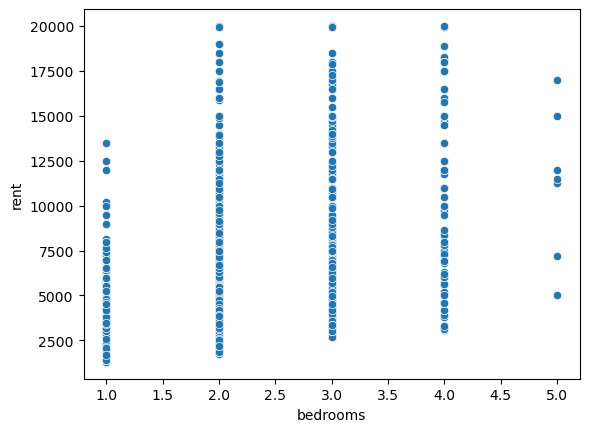

In [11]:
ax = sns.scatterplot(x = rent['bedrooms'], y=rent['rent'])

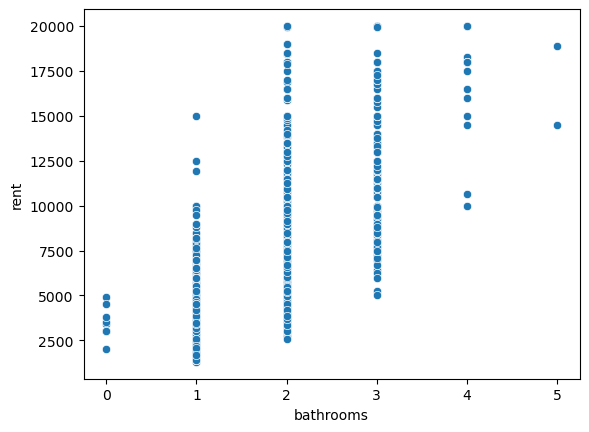

In [12]:
ax = sns.scatterplot(x = rent['bathrooms'], y=rent['rent'])

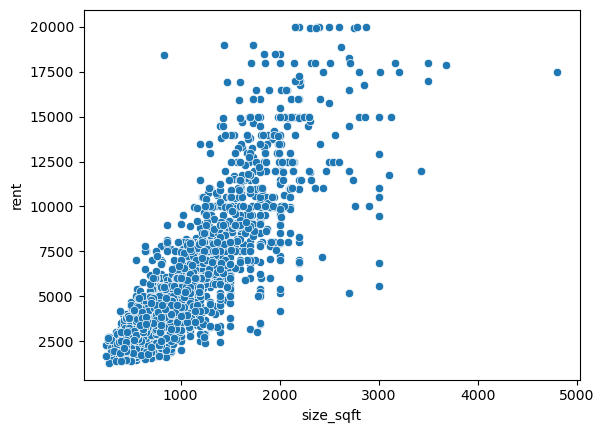

In [13]:
ax = sns.scatterplot(x = rent['size_sqft'], y=rent['rent'])

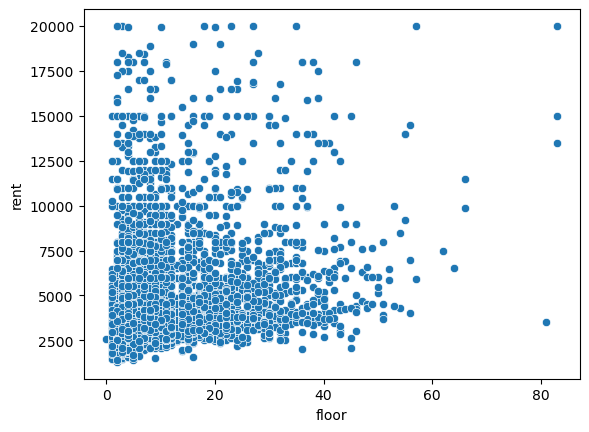

In [14]:
ax = sns.scatterplot(x = rent['floor'], y=rent['rent'])

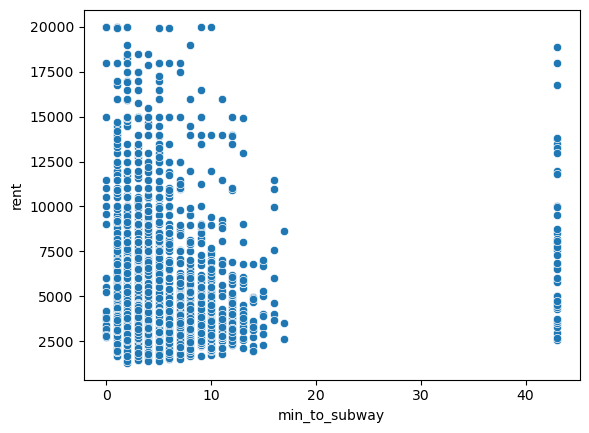

In [15]:
ax = sns.scatterplot(x = rent['min_to_subway'], y=rent['rent'])

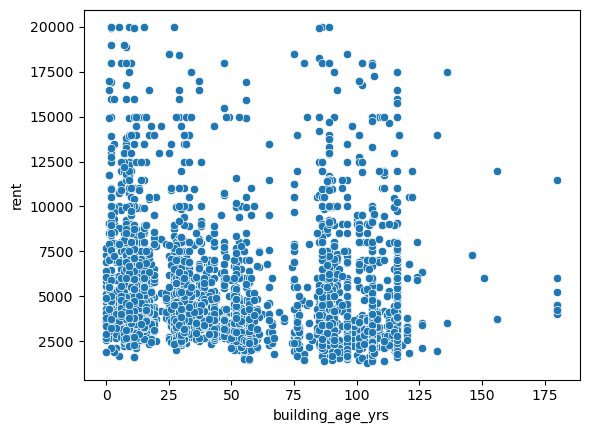

In [16]:
ax = sns.scatterplot(x = rent['building_age_yrs'], y=rent['rent'])

<AxesSubplot:>

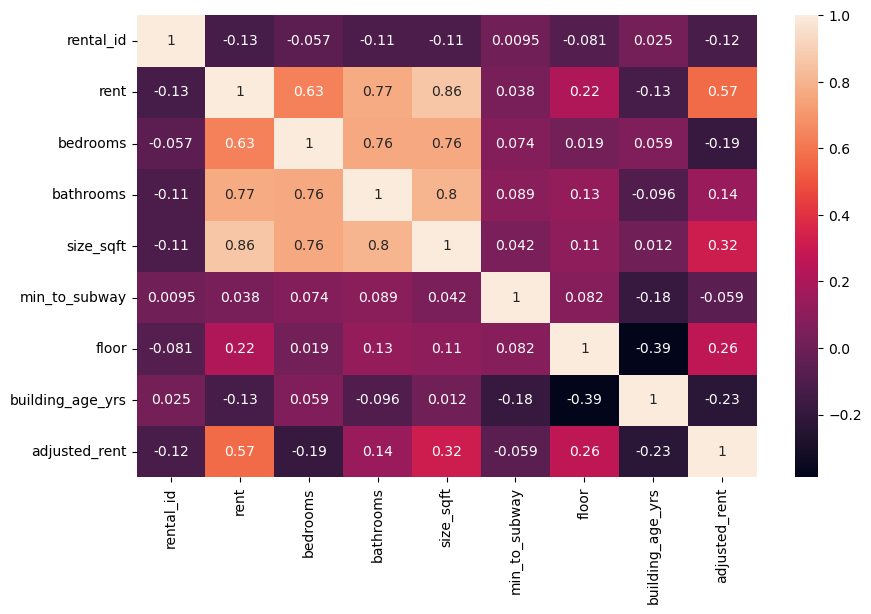

In [17]:
cor = rent.corr()

plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True)


In [18]:
print(rent)

      rental_id     rent  bedrooms  bathrooms  size_sqft  min_to_subway  \
0          1545   2550.0       1.0          1      480.0              9   
1          2472  11500.0       2.0          2     2000.0              4   
2          2919   4500.0       1.0          1      916.0              2   
3          2790   4795.0       1.0          1      975.0              3   
4          3946  17500.0       2.0          2     4800.0              3   
...         ...      ...       ...        ...        ...            ...   
3534       7582   4210.0       1.0          1      532.0              3   
3535       5686   6675.0       2.0          2      988.0              5   
3536       9679   1699.0       1.0          1      250.0              2   
3537       5188   3475.0       1.0          1      651.0              6   
3538       4718   4500.0       1.0          1      816.0              4   

      floor  building_age_yrs  adjusted_rent  
0       2.0                17         2550.0  
1    

In [19]:
rent2 = rent.norm.copy()

rent2.drop(['bathrooms','min_to_subway','adjusted_rent','building_age_yrs','floor','rental_id'], axis = 1, inplace = True)

In [20]:
rentT = rent2.loc[:2444]
rentF = rent2.loc[2445:]

In [21]:
rentT.reset_index(drop=True,inplace=True)

In [33]:
def findW1(a,b,c):
    sums = 0
    for i in range(0,len(rentT)-1):
        sums += abs((abs((a*rentT["size_sqft"][i])+(b*rentT["rent"][i])+(c))/((a**2+b**2)**0.5)))
    return sums

def bestW1(c):
    allSums=[]
    x=-1.0
    placeHold=[]
    for i in range(1000):
        allSums.append(findW1(i,-1,c))
        placeHold.append(x)
        x+=0.001
    ret = allSums[0]
    ret1=0.0
    for i in range(len(allSums)-1):
        if allSums[i+1]<ret:
            ret = allSums[i+1]
            ret1 = placeHold[i+1]
    return ret1

def findW2(a,b,c):
    sums = 0
    for i in range(0,len(rentT)-1):
        sums += abs((abs((a*rentT["bedrooms"][i])+(b*rentT["rent"][i])+(c))/((a**2+b**2)**0.5)))
    return sums

def bestW2(c):
    allSums=[]
    x=-1.0
    placeHold=[]
    for i in range(1000):
        allSums.append(findW2(i,-1,c))
        placeHold.append(x)
        x+=0.001
    ret = allSums[0]
    ret1 = 0.00
    for i in range(len(allSums)-1):
        if allSums[i+1]<ret:
            ret = allSums[i+1]
            ret1 = placeHold[i+1]
    return ret1

def calc(c):
    w1 = bestW1(c)
    w2 = bestW2(c)
    sums=0
    for i in range(0,len(rentT)-1):
        sums += abs(w1*rentT["size_sqft"][i]+w2*rentT["bedrooms"][i]+c-1)/((w1**2+w2**2+1)**0.5)
    return sums, w1,w2

def getBest():
    bests=[]
    ints=[]
    w1s=[]
    w2s=[]
    x=-1.0
    for i in range(200):
        sumx, w1,w2 = calc(x)
        ints.append(x)
        bests.append(sumx)
        x+=0.01
        w1s.append(w1)
        w2s.append(w2)
    ret=bests[0]
    index=0
    for i in range(len(bests)-1):
        if bests[i+1]<ret:
            ret=bests[i+1]
            index=i
    return ret, ints[index],w1s[index],w2s[index]

sums, y, w1, w2 = getBest()

KeyboardInterrupt: 

In [32]:
print(sums)
print(w1)
print(w2)
print(y)

30.968312114819515
-0.009999999999999247
-0.009999999999999247
0.9800000000000014


In [ ]:
rentF.info()

In [ ]:
#record

#

#distance    30.968312114819515
#weight1     -0.009999999999999247
#weight2     -0.009999999999999247
#yint         0.9800000000000014


rentF.reset_index(drop=True,inplace=True)
mse=0
for row in range(len(rentF)):
    sqft= rentF.iat[row, 3]
    bath= rentF.iat [row, 2]
    bed= rentF.iat [row, 1]
    rent= rentF.iat [row, 0]
    mse +=((-1.4446869056264362*sqft + 0.24149161107278438 + -0.38252394456741223*bath + 2.928854034274871*bed)-rent)**2
mse = mse/len(rentF)
print(mse)